Using column: Have you ever written an `agents.md`, modified your `.claude` directory, or added context specifically for agents in other way?


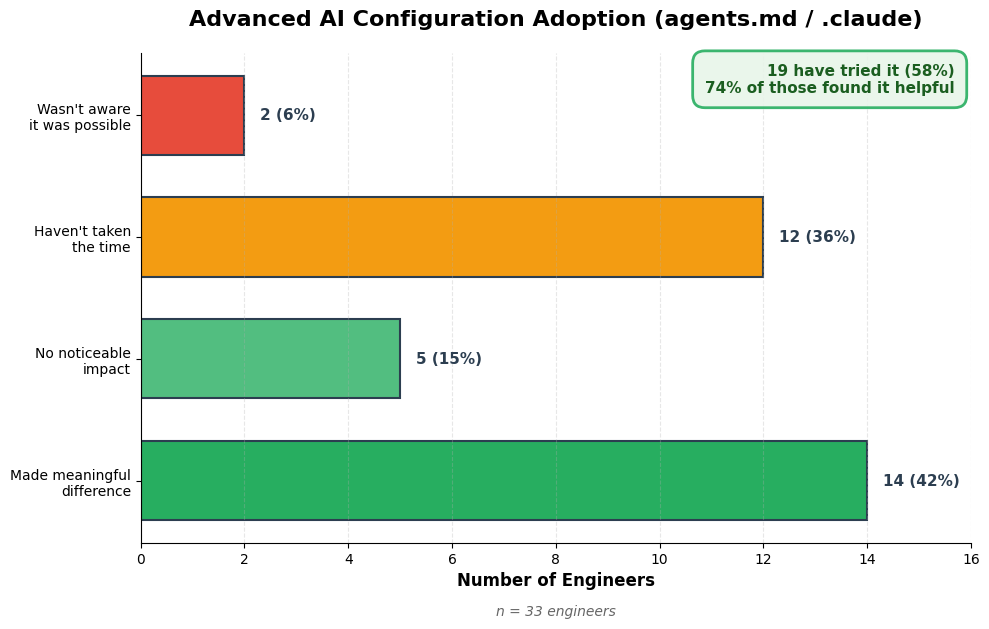


ADVANCED AI CONFIGURATION (agents.md / .claude) ADOPTION

📊 Sample Size: 33 engineers

🚀 Adoption Breakdown:
   • Yes -- and it made a meaningful difference
     Count: 14 (42.4%)
   • Yes -- but I didn't notice much impact
     Count: 5 (15.2%)
   • No -- I know it's possible but haven't taken the time
     Count: 12 (36.4%)
   • No -- I wasn't aware that was possible
     Count: 2 (6.1%)

✨ Key Insights:
   • 19 engineers (57.6%) have tried advanced configuration
   • Of those who tried, 74% found it made a meaningful difference
   • 12 engineers know about it but haven't tried yet
   • 2 engineers weren't aware this was possible

💡 Opportunity:
   • 14 engineers (42%) could benefit from education/training
   • Given that 74% who tried found it helpful, there's significant untapped potential




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('../responses.csv')

# Filter out non-engineering teams
teams_to_exclude = ['Customer Solutions', 'Customer Support', 'Pre-Sales']
df_filtered = df[~df['Which team are you a part of?'].isin(teams_to_exclude)].copy()

# Access column Q (index 16, since A=0, B=1, ..., Q=16)
# This should be the agents.md/.claude column
agents_col = df_filtered.columns[16]

print(f"Using column: {agents_col}")

# Count the responses
agents_counts = df_filtered[agents_col].value_counts()

# Define the order we want
agents_order = [
    'Yes -- and it made a meaningful difference',
    'Yes -- but I didn\'t notice much impact',
    'No -- I know it\'s possible but haven\'t taken the time',
    'No -- I wasn\'t aware that was possible'
]

# Reindex to get consistent ordering
agents_counts = agents_counts.reindex(agents_order, fill_value=0)

# Calculate key metrics
total_engineers = len(df_filtered)
tried_it = agents_counts.iloc[0] + agents_counts.iloc[1]
found_helpful = agents_counts.iloc[0]
tried_percentage = (tried_it / total_engineers) * 100
helpful_percentage = (found_helpful / tried_it * 100) if tried_it > 0 else 0

# Create figure
fig, ax = plt.subplots(figsize=(10, 6.4))

# Define appealing colors
colors = ['#27AE60', '#52BE80', '#F39C12', '#E74C3C']  # Green gradient to orange/red

# Wrap labels for better display
wrapped_labels = [
    'Made meaningful\ndifference',
    'No noticeable\nimpact',
    'Haven\'t taken\nthe time',
    'Wasn\'t aware\nit was possible'
]

bars = ax.barh(wrapped_labels, agents_counts.values, 
               color=colors, height=0.65, edgecolor='#2C3E50', linewidth=1.5)

# Add value labels
for bar, count in zip(bars, agents_counts.values):
    percentage = (count / total_engineers) * 100
    ax.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2, 
            f'{int(count)} ({percentage:.0f}%)', 
            va='center', fontsize=11, weight='bold', color='#2C3E50')

# Customize the plot
ax.set_xlabel('Number of Engineers', fontsize=12, weight='bold')
ax.set_title('Advanced AI Configuration Adoption (agents.md / .claude)', 
             fontsize=16, weight='bold', pad=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0, max(agents_counts.values) + 2)
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Add insight box
insight_text = f"{int(tried_it)} have tried it ({tried_percentage:.0f}%)\n"
insight_text += f"{helpful_percentage:.0f}% of those found it helpful"

ax.text(0.98, 0.98, insight_text.strip(), 
         transform=ax.transAxes,
         ha='right', 
         va='top',
         fontsize=11, 
         weight='bold',
         bbox=dict(boxstyle='round,pad=0.8', facecolor='#E8F5E9', 
                  edgecolor='#27AE60', linewidth=2, alpha=0.9),
         color='#1B5E20')

# Add subtitle
plt.text(0.5, -0.15, f'n = {total_engineers} engineers', 
         ha='center', transform=ax.transAxes,
         fontsize=10, style='italic', color='#666666')

plt.tight_layout()
plt.show()

# Print summary
print("\n" + "="*80)
print("ADVANCED AI CONFIGURATION (agents.md / .claude) ADOPTION")
print("="*80)

print(f"\n📊 Sample Size: {total_engineers} engineers")

print(f"\n🚀 Adoption Breakdown:")
for i, (response, count) in enumerate(zip(agents_order, agents_counts.values)):
    percentage = (count / total_engineers) * 100
    print(f"   • {response}")
    print(f"     Count: {int(count)} ({percentage:.1f}%)")

print(f"\n✨ Key Insights:")
print(f"   • {int(tried_it)} engineers ({tried_percentage:.1f}%) have tried advanced configuration")
print(f"   • Of those who tried, {helpful_percentage:.0f}% found it made a meaningful difference")
print(f"   • {int(agents_counts.iloc[2])} engineers know about it but haven't tried yet")
print(f"   • {int(agents_counts.iloc[3])} engineers weren't aware this was possible")

print(f"\n💡 Opportunity:")
aware_but_not_tried = agents_counts.iloc[2]
not_aware = agents_counts.iloc[3]
total_opportunity = aware_but_not_tried + not_aware
print(f"   • {int(total_opportunity)} engineers ({total_opportunity/total_engineers*100:.0f}%) could benefit from education/training")
print(f"   • Given that {helpful_percentage:.0f}% who tried found it helpful, there's significant untapped potential")

print("\n" + "="*80 + "\n")